<a href="https://colab.research.google.com/github/tejus86/Tejaswini-S/blob/main/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Convolution layer:** Converts images into an array


It is the first layer of a convolutional Neural Network.

Stores the pixelated values of image into an array.

Used for extracting the features of the image and reducing its dimensionality.

2. **Relu layer :** Regularization used to convert negative numbers to zero


Range of ReLU: 0 to infinity.


3. **Pooling layer :** Used for reduction of the input image size with filters

Used to reduce the spatial size and the numbers of parameters.

Pooling is used to reduce dimensionality.

Helps to control overfitting.

Filters of size 2x2 are commonly used in it.


**STRIDE:** Amount of movement between applications of the filter to the input image.

**Flatten:**  Converting  the pooled feature map into an array.( i.e., converting array into another dimension)



4. **Fully connected layer** : Combines features and produces a model


Combines all the features together to create a final model.

Final step in the process of a convolutional neural network.


In [2]:
# Import train and test dataset

In [3]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2021-09-14 16:58:36--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2021-09-14 16:58:36--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdadd2d4994d8de729c7b792ff6.dl.dropboxusercontent.com/cd/0/inline/BWKCbsRKyFleQILfQ8znPteAgT6ebDxWtL8CfpbilrnXnpTET2luvzSLRLAzIhA2gfJL7AcWqv-uMDm1Z5csziJe6e9r3Qm-Ebv5txioS5jwmtW13t-F9rc2yBBBJmgQTcvdk0GVQkTOAni7n4UlrAqq/file# [following]
--2021-09-14 16:58:36--  https://ucdadd2d4994d8de729c7b792ff6.dl.dropboxusercontent.com/cd/0/inline/BWKCbsRKyFleQILfQ8znPteAgT6ebDxWtL8CfpbilrnXnpTET2luvzSLRLAzIhA2gfJL7AcWqv-

In [4]:
# Unzip dataset 

In [4]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [6]:
# Print sample image of cat

Populating the interactive namespace from numpy and matplotlib


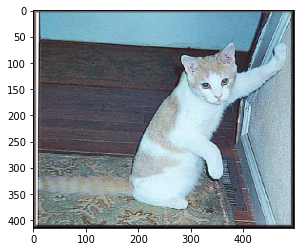

In [5]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as npimg
img = npimg.imread('/content/test_set/test_set/cats/cat.4001.jpg')
imgplt = plt.imshow(img)
plt.show()

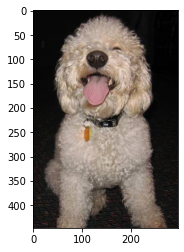

In [6]:
img = npimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplt = plt.imshow(img)
plt.show()

In [12]:
# Importing required

In [7]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
print(tensorflow.__version__)

2.6.0


In [22]:
# Parameter initialization

In [9]:
img_width, img_height = 150,150  # reducing image size to 150x150
train_data_dir = r"/content/training_set/training_set"
validation_data_dir = r"/content/test_set/test_set"
nb_train_sample =100
nb_validation_samples = 100
epochs = 20
batch_size = 20

In [24]:
# Checking shapes of the images

In [10]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
  input_shape = (3, img_width, img_height)
else:
  input_shape = (img_width, img_height, 3)

In [28]:
# Image generation to train the model

In [11]:
train_datagen = ImageDataGenerator(rescale =1. /255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale =1. /255)  # Briging RGBvalues from 0-255 to a range of 0-1
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=batch_size, class_mode='binary', classes=['cats', 'dogs'])
validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size = (img_width,img_height),
                                                        batch_size=batch_size, class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [30]:
# Representation of ImageDataGenerator

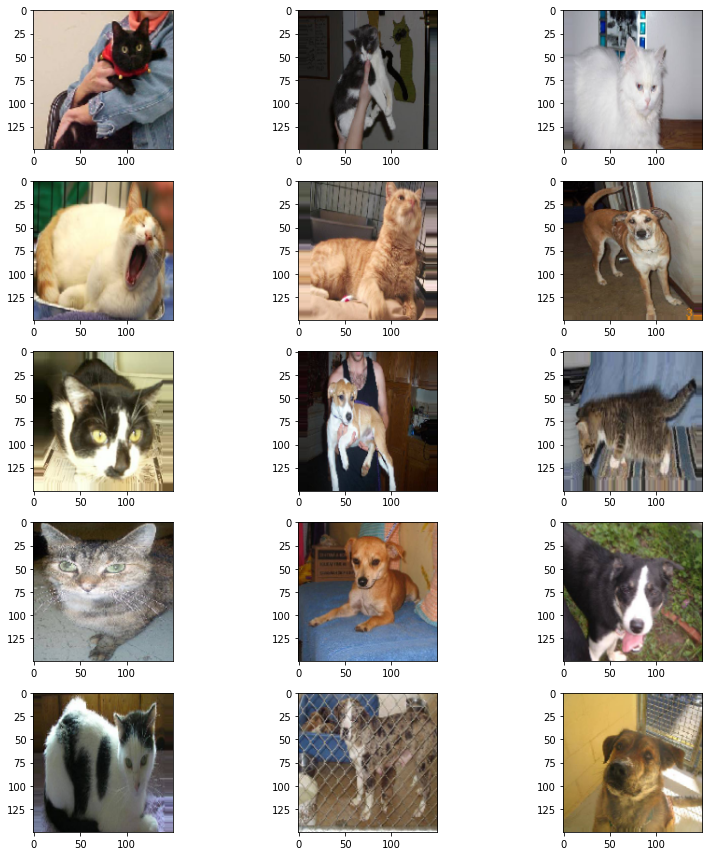

In [12]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for X_batch, Y_batch in train_generator:
    image = X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

In [37]:
# Building CNN model

In [13]:
model = Sequential()
model.add(Conv2D(64,(3,3), input_shape= input_shape)) # 64 neurons using a 3x3 filter

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # Pooling reduces thge size of the data

model.add(Flatten()) # conversion of multi-dimensional array to 1D array
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dense(1)) # Output layer
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [39]:
# model compilation

In [14]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [41]:
# Model fitting

In [15]:
training = model.fit(train_generator, steps_per_epoch = nb_train_sample, epochs=epochs, validation_steps = nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 68s 672ms/step - loss: 1.7913 - accuracy: 0.5695
Epoch 2/20
100/100 [==============================] - 66s 662ms/step - loss: 0.6683 - accuracy: 0.6190
Epoch 3/20
100/100 [==============================] - 66s 659ms/step - loss: 0.6532 - accuracy: 0.6375
Epoch 4/20
100/100 [==============================] - 66s 662ms/step - loss: 0.6434 - accuracy: 0.6560
Epoch 5/20
100/100 [==============================] - 66s 658ms/step - loss: 0.6312 - accuracy: 0.6655
Epoch 6/20
100/100 [==============================] - 66s 662ms/step - loss: 0.6266 - accuracy: 0.6690
Epoch 7/20
100/100 [==============================] - 66s 659ms/step - loss: 0.6101 - accuracy: 0.6811
Epoch 8/20
100/100 [==============================] - 66s 662ms/step - loss: 0.6026 - accuracy: 0.7013
Epoch 9/20
100/100 [==============================] - 67s 664ms/step - loss: 0.6100 - accuracy: 0.6870
Epoch 10/20
100/100 [==============================] - 67s 666ms/step - l

In [43]:
# Finding out model accuracy

dict_keys(['loss', 'accuracy'])


KeyError: ignored

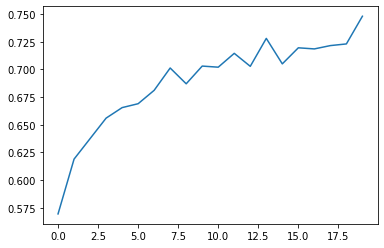

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys())   # listing all training data
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()



In [44]:
# Image prediction

[[0.]]
Prediction:  Cat


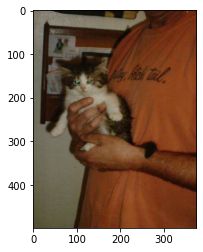

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4008.jpg", target_size=(150,150))


img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0] == 1:
  prediction = "Dog"
else:
  prediction = "Cat"
print('Prediction: ', prediction)

img = npimg.imread('/content/test_set/test_set/cats/cat.4002.jpg')
imgplot = plt.imshow(img)
plt.show()